In [120]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('data/warfarin.csv')
df = df.dropna(subset = ['Therapeutic Dose of Warfarin'])

def get_bucket(dosage):
    if dosage < 3:
        return 'low'
    elif dosage <= 7:
        return 'medium'
    else:
        return 'high'
    
df['dosage_bucket'] = (df['Therapeutic Dose of Warfarin']/7).apply(get_bucket)

In [3]:
def get_accuracy(correct, pred):
    x = correct == pred
    return sum(x) / len(x)

In [354]:
# baseline return 5, get the accuracy
is_medium = 'medium'
get_accuracy(df['dosage_bucket'], is_medium)

0.611794500723589

In [350]:
# function to extract decade from df
def get_decade(x):
    if type(x) == str:
        return int(x[:2]) // 10
    return 0

In [351]:
# create features for clinical baseline
df = df.dropna(subset = ['Age', 'Height (cm)', "Weight (kg)"])
df = df.dropna(how = 'all', \
            subset = ['Carbamazepine (Tegretol)', 'Phenytoin (Dilantin)', 'Rifampin or Rifampicin'])

df['Bias'] = 1
df['Age in decades'] = df['Age'].apply(get_decade)
df['Asian'] = [1 if race == 'Asian' else 0 for race in df['Race']]
df['Black or African American'] = [1 if race == 'Black or African American' else 0 for race in df['Race']]
df['Missing or Mixed Race'] = [1 if race == 'Unknown' else 0 for race in df['Race']]
df['Enzyme inducer status'] = ((df['Carbamazepine (Tegretol)'] == 1) | \
                               (df['Phenytoin (Dilantin)'] == 1) | (\
                                df['Rifampin or Rifampicin'] == 1)).astype(int)
df['Amiodarone status'] = (df['Amiodarone (Cordarone)'] == 1).astype(int)

features = df[['Bias', 'Age in decades', 'Height (cm)', 'Weight (kg)', 'Asian', 'Black or African American', 
               'Missing or Mixed Race','Enzyme inducer status', 'Amiodarone status']]
# save to a csv
df.to_csv('data/clinical_dosing_features.csv')

In [280]:
features.head()
len(features)

2130

In [281]:
# run the clinical dosing predicted dosage, get the accuracy
beta = np.array([4.0376, -0.2546, 0.0118, 0.0134, -0.6752, 0.406, 0.0443, 1.2799, -0.5695])

def get_dosage_bucket(x):
    dosage = x.dot(beta)**2 / 7
    return get_bucket(dosage)

dosage_buckets = features.apply(get_dosage_bucket, axis=1)
get_accuracy(df['dosage_bucket'], dosage_buckets)

0.6610328638497652

In [131]:
feature_list = ['weight_bucket', 'height_bucket', 'Gender', 'Race', 'Ethnicity', 'Age', 'Cyp2C9 genotypes', \
            'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T', \
            'VKORC1 genotype: 497T>G (5808); chr16:31013055; rs2884737; A/C', \
            'VKORC1 QC genotype: 1173 C>T(6484); chr16:31012379; rs9934438; A/G', \
            'VKORC1 genotype: 1542G>C (6853); chr16:31012010; rs8050894; C/G', \
            'VKORC1 genotype: 3730 G>A (9041); chr16:31009822; rs7294;  A/G', \
            'VKORC1 genotype: 2255C>T (7566); chr16:31011297; rs2359612; A/G', \
            'VKORC1 genotype: -4451 C>A (861); Chr16:31018002; rs17880887; A/C', \
            'Carbamazepine (Tegretol)', 'Phenytoin (Dilantin)', 'Rifampin or Rifampicin', 'Amiodarone (Cordarone)',\
            'Target INR']

feature_list = ['Gender', 'Race', 'Ethnicity', 'Age', 'Cyp2C9 genotypes', \
        'Aspirin', 'Acetaminophen or Paracetamol (Tylenol)',
        'Was Dose of Acetaminophen or Paracetamol (Tylenol) >1300mg/day',
        'Simvastatin (Zocor)', 'Atorvastatin (Lipitor)', 'Fluvastatin (Lescol)',
        'Lovastatin (Mevacor)', 'Pravastatin (Pravachol)',
        'Rosuvastatin (Crestor)', 'Cerivastatin (Baycol)',
        'Amiodarone (Cordarone)', 'Carbamazepine (Tegretol)',
        'Phenytoin (Dilantin)', 'Rifampin or Rifampicin',
        'Sulfonamide Antibiotics', 'Macrolide Antibiotics',
        'Anti-fungal Azoles', 'Herbal Medications, Vitamins, Supplements',
        'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T', \
        'VKORC1 genotype: 497T>G (5808); chr16:31013055; rs2884737; A/C', \
        'VKORC1 QC genotype: 1173 C>T(6484); chr16:31012379; rs9934438; A/G', \
        'VKORC1 genotype: 1542G>C (6853); chr16:31012010; rs8050894; C/G', \
        'VKORC1 genotype: 3730 G>A (9041); chr16:31009822; rs7294;  A/G', \
        'VKORC1 genotype: 2255C>T (7566); chr16:31011297; rs2359612; A/G', \
        'VKORC1 genotype: -4451 C>A (861); Chr16:31018002; rs17880887; A/C', \
        'Subject Reached Stable Dose of Warfarin', 'Current Smoker']

df[feature_list] = df[feature_list].astype('object')

def bucket_weight(x):
    return str((x-30)//20)

def bucket_height(x):
    return str((x-120)//10)

df['weight_bucket'] = df['Weight (kg)'].apply(bucket_weight)
df['height_bucket'] = df['Height (cm)'].apply(bucket_height)

df['Target INR'] = df['Target INR'].astype('object')
df['Amiodarone (Cordarone)'] = df['Amiodarone (Cordarone)'].astype('object')
df['Carbamazepine (Tegretol)'] = df['Carbamazepine (Tegretol)'].astype('object')
df['Phenytoin (Dilantin)'] = df['Phenytoin (Dilantin)'].astype('object')
df['Rifampin or Rifampicin'] = df['Rifampin or Rifampicin'].astype('object')

# feature_list = ['Gender', 'Race', 'Ethnicity', 'Age', \
# 				'Carbamazepine (Tegretol)', 'Phenytoin (Dilantin)', 'Rifampin or Rifampicin']
features = pd.get_dummies(df[feature_list], dummy_na=True)
features['bias'] = 1
features['dosage_bucket'] = df['dosage_bucket']
features.head()

,Gender_female,Gender_male,Gender_nan,Race_Asian,Race_Black or African American,Race_Unknown,Race_White,Race_nan,Ethnicity_Hispanic or Latino,Ethnicity_Unknown,...,VKORC1 genotype: -4451 C>A (861); Chr16:31018002; rs17880887; A/C_C/C,VKORC1 genotype: -4451 C>A (861); Chr16:31018002; rs17880887; A/C_nan,Subject Reached Stable Dose of Warfarin_0.0,Subject Reached Stable Dose of Warfarin_1.0,Subject Reached Stable Dose of Warfarin_nan,Current Smoker_0.0,Current Smoker_1.0,Current Smoker_nan,bias,dosage_bucket
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,medium
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,medium
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,high
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,medium
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,medium


count    5256.000000
mean       77.846423
std        21.958541
min        30.000000
25%        62.000000
50%        75.000000
75%        90.000000
max       237.700000
Name: Weight (kg), dtype: float64

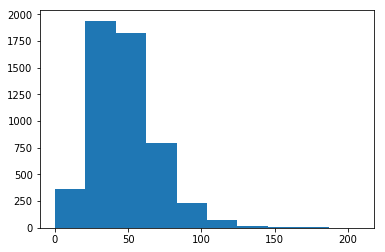

In [76]:
plt.hist(df['Weight (kg)'].dropna()-30)

(df['Weight (kg)']).describe()


In [83]:
df['Ethnicity'].value_counts()
df['Race'].value_counts()
df['Diabetes'].value_counts()

0.0    2531
1.0     595
Name: Diabetes, dtype: int64

In [112]:
feature_list = ['Current Smoker']
c = pd.get_dummies(df[feature_list], dummy_na=True)
c['real_dosage'] = df['Therapeutic Dose of Warfarin']
c.corr()['real_dosage']


Current Smoker    0.1234
real_dosage       1.0000
Name: real_dosage, dtype: float64

In [119]:
def normalize_col(col):
    mx, mn =  np.max(col), np.min(col)
    return (col - mn) / (mx-mn)

features['height'] = normalize_col(df['Height (cm)'].fillna(np.mean(df['Height (cm)'])))
features['height'].describe()

count    5528.000000
mean        0.559419
std         0.126209
min         0.000000
25%         0.481371
50%         0.559419
75%         0.636375
max         1.000000
Name: height, dtype: float64

In [87]:
df.columns

Index(['PharmGKB Subject ID', 'Gender', 'Race', 'Ethnicity', 'Age',
       'Height (cm)', 'Weight (kg)', 'Indication for Warfarin Treatment',
       'Comorbidities', 'Diabetes',
       'Congestive Heart Failure and/or Cardiomyopathy', 'Valve Replacement',
       'Medications', 'Aspirin', 'Acetaminophen or Paracetamol (Tylenol)',
       'Was Dose of Acetaminophen or Paracetamol (Tylenol) >1300mg/day',
       'Simvastatin (Zocor)', 'Atorvastatin (Lipitor)', 'Fluvastatin (Lescol)',
       'Lovastatin (Mevacor)', 'Pravastatin (Pravachol)',
       'Rosuvastatin (Crestor)', 'Cerivastatin (Baycol)',
       'Amiodarone (Cordarone)', 'Carbamazepine (Tegretol)',
       'Phenytoin (Dilantin)', 'Rifampin or Rifampicin',
       'Sulfonamide Antibiotics', 'Macrolide Antibiotics',
       'Anti-fungal Azoles', 'Herbal Medications, Vitamins, Supplements',
       'Target INR', 'Estimated Target INR Range Based on Indication',
       'Subject Reached Stable Dose of Warfarin',
       'Therapeutic Dose of 